In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape

(4446966, 29)

<p><strong>Data Description</strong></p>
<p><strong>DBNOs:</strong> Number of enemy players knocked.</p>
<p><strong>Assists:</strong> Number of enemy players this player damaged that were killed by teammates.</p>
<p><strong>Boosts:</strong> Number of boost items used.</p>
<p><strong>DamageDealt:</strong> Total damage dealt. Note: Self-inflicted damage is subtracted.</p>
<p><strong>HeadshotKills:</strong> Number of enemy players killed with headshots.</p>
<p><strong>Heals:</strong> Number of healing items used.</p>
<p><strong>Id:</strong> Player’s Id.</p>
<p><strong>KillPlace:</strong> Ranking in match of number of enemy players killed.</p>
<p><strong>KillPoints:</strong> Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.</p>
<p><strong>KillStreaks:</strong> Max number of enemy players killed in a short amount of time.</p>
<p><strong>Kills:</strong> Number of enemy players killed.</p>
<p><strong>LongestKill:</strong> Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.</p>
<p><strong>MatchDuration:</strong> Duration of match in seconds.</p>
<p><strong>MatchId:</strong> ID to identify match. There are no matches that are in both the training and testing set.</p>
<p><strong>MatchType:</strong> String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.</p>
<p><strong>RankPoints:</strong> Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.</p>
<p><strong>Revives:</strong> Number of times this player revived teammates.</p>
<p><strong>RideDistance:</strong> Total distance traveled in vehicles measured in meters.</p>
<p><strong>RoadKills:</strong> Number of kills while in a vehicle.</p>
<p><strong>SwimDistance:</strong> Total distance traveled by swimming measured in meters.</p>
<p><strong>TeamKills:</strong> Number of times this player killed a teammate.</p>
<p><strong>VehicleDestroys:</strong> Number of vehicles destroyed.</p>
<p><strong>WalkDistance:</strong> Total distance traveled on foot measured in meters.</p>
<p><strong>WeaponsAcquired:</strong> Number of weapons picked up.</p>
<p><strong>WinPoints:</strong> Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.</p>
<p><strong>GroupId:</strong> ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.</p>
<p><strong>NumGroups:</strong> Number of groups we have data for in the match.</p>
<p><strong>MaxPlace:</strong> Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.</p>
<p><strong>WinPlacePerc:</strong> The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.</p>ve missing chunks in a match.

## Data Wrangling

df[df["winPlacePerc"].isnull()]

In [16]:
df = df.drop(2744604)

In [18]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### prepare new parameter to know how many players are in a game


In [20]:
df["playersJoined"] = df.groupby("matchId")["matchId"].transform("count")

In [21]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


## Analysing the data and removing the anomalies

In [24]:
# removing the instances where the kills of person without moving exceeds 0 as it is impractical

In [26]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined'],
      dtype='object')

In [27]:
df["totalDistance"] = df["walkDistance"]+df["rideDistance"]+df["swimDistance"]

In [28]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.00,0,0,244.80,1,1466,0.4444,96,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.00,0,0,161.80,2,0,0.7755,98,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.00,0,0,202.70,3,0,0.1667,91,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.00,0,0,49.75,2,0,0.1875,97,49.7500


In [29]:
#preparing a columns where a player has not moved yet killed

In [78]:
df["killedWithoutMoving"] = ((df["kills"]>0) & (df["totalDistance"]==0))

In [36]:
df[df["killedWithoutMoving"]==True].shape #there are 1535 instances where the players have killed without moving so we remove them

(1535, 32)

In [39]:
df = df.drop(df[df["killedWithoutMoving"]==True].index, axis=0)

In [40]:
df.shape

(4445430, 32)

In [41]:
# extra-ordinary road kills - if the roadKills exceed 5 then it is impractical and hence we remove it

In [64]:
df[df["roadKills"]>5].shape

(0, 33)

In [43]:
df = df.drop(df[df["roadKills"]>5].index, axis=0)

In [44]:
df.shape

(4445384, 32)

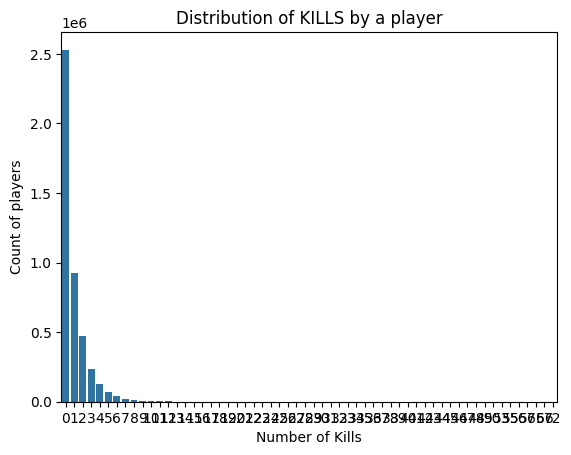

In [45]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [47]:
# we see that the majority of the players have killed less than 5 enemies per game so the max kill should br around 20 even for a pro-player.
#hence, anything greater than that will be dropped

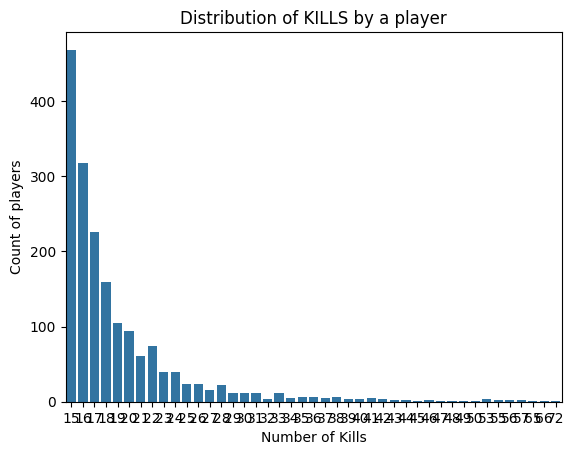

In [49]:
sns.countplot(data = df, x = df[df['kills']>=15]["kills"]).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [50]:
df = df.drop(df[df["kills"]>20].index, axis=0)

In [51]:
df.shape

(4444967, 32)

In [52]:
# another anomaly is killing too many enemies with Head-Shots

In [56]:
df["headshotRate"] = df["headshotKills"]/df["kills"]

In [57]:
# headshotRate is the % of kills that the player has done by headshot out of all the kills

In [61]:
df = df.drop(df[(df["headshotRate"]==1)&(df["kills"]>5)].index, axis=0)

In [62]:
df.shape

(4444780, 33)

In [63]:
# another anomaly would be killing from a distance greater than 500m so we drop it

In [65]:
df = df.drop(df[df["longestKill"]>500].index, axis=0)

In [66]:
df.shape

(4443044, 33)

In [67]:
#another anomaly would be if the player acquires more than 15 weapons in a game

In [68]:
df = df.drop(df[df["weaponsAcquired"]>15].index, axis=0)

In [69]:
df.shape

(4437609, 33)

# EDA

<Axes: >

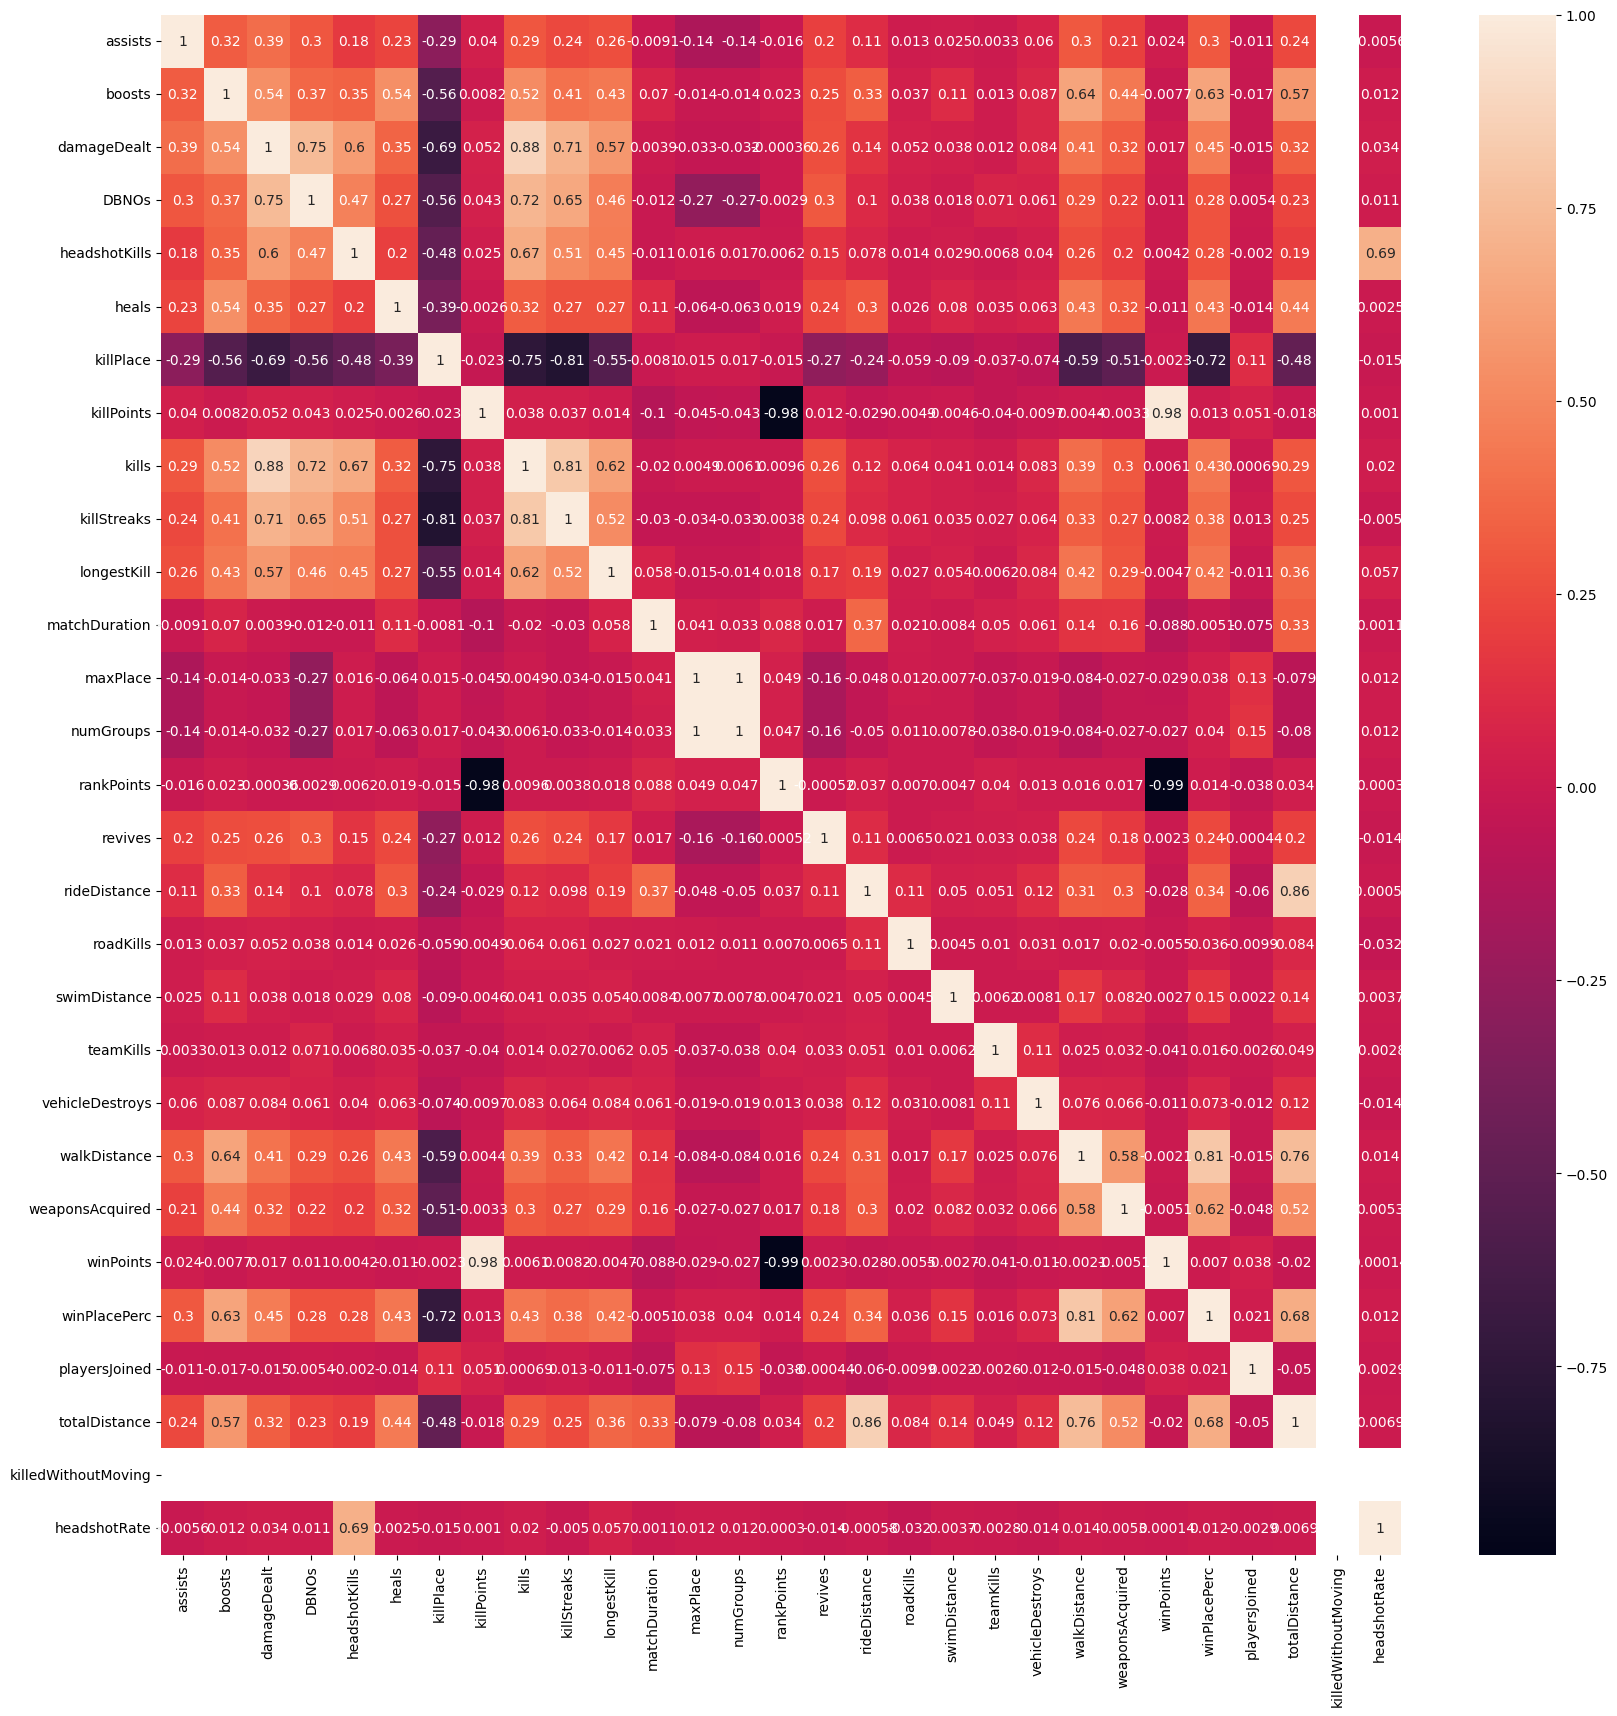

In [71]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(), annot=True)

# Feature Engineering

In [72]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [73]:
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [79]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance',
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [80]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playersJoined', 'totalDistance', 'killedWithoutMoving',
       'headshotRate', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

# ML CatBoost Model

In [83]:
x = data.drop(["winPlacePerc"], axis=1)
y = data["winPlacePerc"]

In [84]:
x = pd.get_dummies(x, columns=["matchType", "killedWithoutMoving"])

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scx = StandardScaler()

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [89]:
xtrain = scx.fit_transform(xtrain)

In [90]:
xtest = scx.transform(xtest)

# CatBoost Model

In [92]:
!pip install catboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.3/101.1 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.5/101.1 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.7/101.1 MB 3.8 MB/s eta 0:00:27
   ---------------------------------------- 1.0/101.1 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 1.2/101.1 MB 4.4 MB/s eta 0:00:23
    --------------------------------------- 1.4/101.1 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.5/101.1 MB 4.3 MB/s eta 0:00:24
    --------------------------------------- 1.7/101.1 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.9/101.1 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 2.1/101.1 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 2.3/101.1 MB 4.0 MB/s eta 

In [93]:
import catboost as cb

In [94]:
train_ds = cb.Pool(xtrain, ytrain)
test_ds = cb.Pool(xtest, ytest)

In [96]:
model = cb.CatBoostRegressor(loss_function="RMSE")

In [98]:
grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_ds)

0:	learn: 0.5483274	test: 0.5483639	best: 0.5483639 (0)	total: 331ms	remaining: 32.7s
1:	learn: 0.5334763	test: 0.5335119	best: 0.5335119 (1)	total: 493ms	remaining: 24.2s
2:	learn: 0.5191074	test: 0.5191461	best: 0.5191461 (2)	total: 670ms	remaining: 21.7s
3:	learn: 0.5052064	test: 0.5052491	best: 0.5052491 (3)	total: 835ms	remaining: 20s
4:	learn: 0.4917265	test: 0.4917741	best: 0.4917741 (4)	total: 968ms	remaining: 18.4s
5:	learn: 0.4787274	test: 0.4787811	best: 0.4787811 (5)	total: 1.09s	remaining: 17s
6:	learn: 0.4661348	test: 0.4661876	best: 0.4661876 (6)	total: 1.2s	remaining: 16s
7:	learn: 0.4538969	test: 0.4539501	best: 0.4539501 (7)	total: 1.32s	remaining: 15.2s
8:	learn: 0.4421036	test: 0.4421609	best: 0.4421609 (8)	total: 1.44s	remaining: 14.6s
9:	learn: 0.4307018	test: 0.4307620	best: 0.4307620 (9)	total: 1.56s	remaining: 14s
10:	learn: 0.4196943	test: 0.4197557	best: 0.4197557 (10)	total: 1.68s	remaining: 13.6s
11:	learn: 0.4090298	test: 0.4090900	best: 0.4090900 (11)	tot

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [104]:
features = x.columns

In [105]:
imp_features_df = pd.DataFrame()

In [106]:
imp_features_df["features"] = features

In [107]:
imp_features_df["importance"] = model.feature_importances_

In [108]:
imp_features_df = imp_features_df.sort_values(by = ["importance"], ascending = False)

In [109]:
imp_features_df

,features,importance
2,killPlace,41.135212
19,traveldistance,15.515391
4,killStreaks,10.146960
14,totalDistance,9.677875
18,matchDurationNorm,5.406051
13,playersJoined,4.865263
15,headshotRate,3.505157
20,healsnboosts,1.895998
6,numGroups,1.771143
0,DBNOs,1.430628


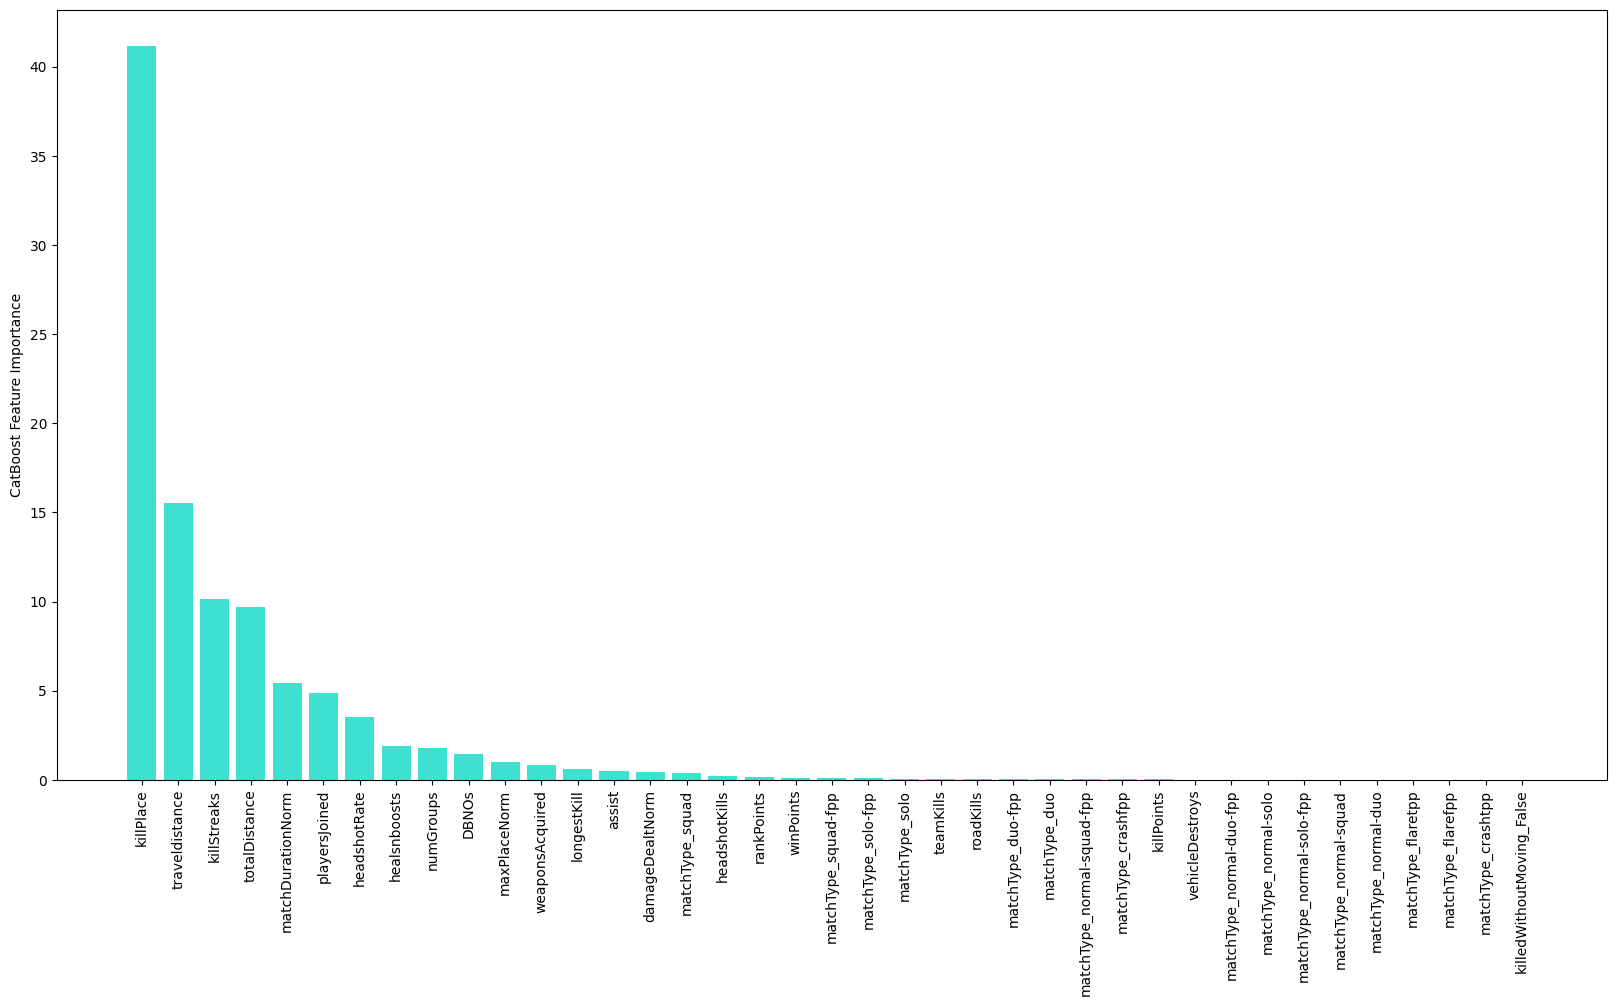

In [113]:
plt.figure(figsize=[20,10])
plt.bar(imp_features_df.features, imp_features_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

In [114]:
pred = model.predict(xtest)

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
rmse = np.sqrt(mean_squared_error(ytest, pred))

In [118]:
r2 = r2_score(ytest, pred) 

In [119]:
print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.09
R2: 0.92


### WINNER WINNER!
### CHICKEN DINNER!